## 데이터 준비

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])



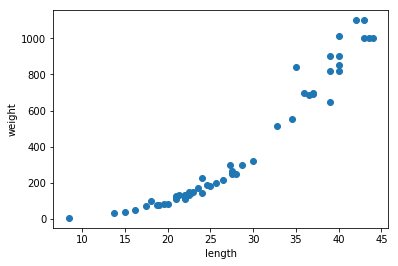

In [4]:
# 산점도로 확인
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
#훈련, 테스트 셋으로 나누자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [7]:
#2차원 배열화 해줘야하는거 알지?
#4, 배열을 2,2 배열로 바까주자
test_array = np.array([1,2,3,4])
#print(test_array.shape)

#변환
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [8]:
train_input = train_input.reshape(-1,1) #-1은 나머지 원소로 채우라는 뜻
test_input = test_input.reshape(-1,1)

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [11]:
#mae 계산
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절대값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# 선형회귀

In [12]:
#sklearn  사용할듯
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 에 농어를 예측한다
print(lr.predict([[50]]))

[1241.83860323]


In [13]:
#회귀계수
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


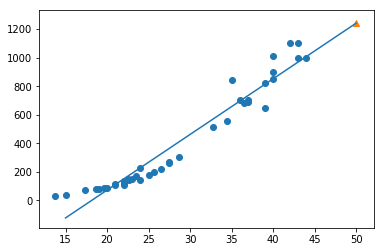

In [14]:
#직선을 그리기 위해 기울기와 절편 사용
#훈련세트의 산점도를 그리자
plt.scatter(train_input, train_target)
#15~50 까지 1차방정식 그리자
#점 두개를 이은것
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어데이터
plt.scatter(50, 1241.8, marker ='^')
plt.show()

In [15]:
#결정계수확인
print(lr.score(train_input, train_target)) #훈련
print(lr.score(test_input, test_target)) #테스트

0.9398463339976039
0.8247503123313558


# 다항회귀